In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import boxcox

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
call = pd.read_csv('train.csv')
data = pd.DataFrame(call)

In [3]:
data = data.dropna(axis = 0, how = 'any')

In [4]:
data.head(2)

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,01-01-2018,77095,Texas,01-01-2018
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,01-01-2018,48185,Michigan,01-01-2018


In [5]:
data['delivery date'] = pd.to_datetime(data['delivery date'])
data['placement date'] = pd.to_datetime(data['placement date'])
data['duration'] = (data['delivery date'] - data['placement date']).dt.days

In [6]:
data.describe()

,id,discount,price,no of items,RID,profit,address code,duration
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,3350.992088,0.155899,234.456367,3.798627,4954.326019,29.124000,54713.799373,6.241976
std,1933.992657,0.205929,641.483317,2.225472,2921.519449,230.730047,32091.912840,46.212168
min,1.000000,0.000000,0.836000,1.000000,1.000000,-6599.978000,1040.000000,0.000000
25%,1676.500000,0.000000,17.340000,2.000000,2389.500000,1.713700,22204.000000,0.000000
50%,3351.000000,0.200000,54.960000,3.000000,4941.000000,8.802000,55113.000000,0.000000
75%,5025.500000,0.200000,212.940000,5.000000,7507.500000,30.023400,90004.000000,0.000000
max,6700.000000,0.800000,22638.480000,14.000000,9990.000000,8399.976000,99301.000000,355.000000


In [7]:
data['RID'].nunique()

6699

In [8]:
data.shape

(6699, 17)

In [9]:
data['address code'].nunique()

562

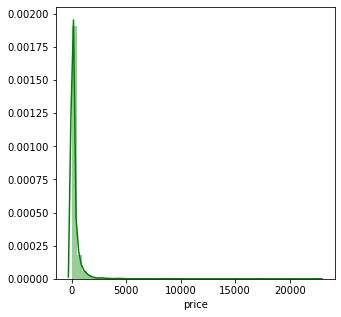

In [10]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(data['price'],color='green')

In [30]:
def Transform(num):
    return np.log(num)

data['price'] = data['price'].apply(Transform)

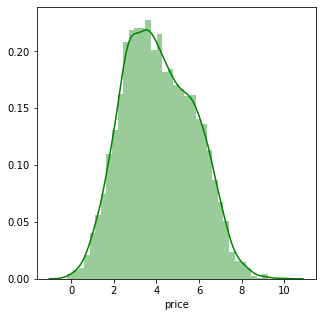

In [31]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(data['price'],color='green')

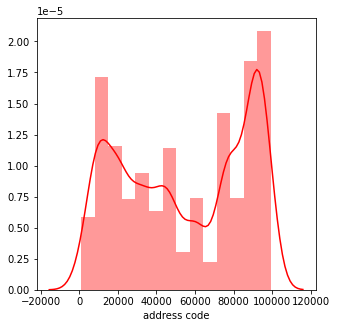

In [32]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(data['address code'],color='red')

# data['address code'] = data['address code'].apply(Transform)

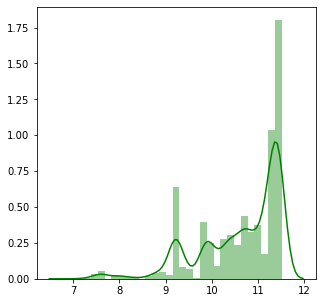

In [33]:
"""
lambda = -1. is a reciprocal transform.
lambda = -0.5 is a reciprocal square root transform.
lambda = 0.0 is a log transform.
lambda = 0.5 is a square root transform.
lambda = 1.0 is no transform.
"""

df = boxcox(data['address code'], 0)
# df1 = boxcox(df, 0.0)
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(df,color='green')

In [34]:
def Tra(num):
    maxx = data['address code'].max()
    minn = data['address code'].min()
    
    return num - minn/ maxx + minn


data['address code new'] = data['address code'].apply(Tra)

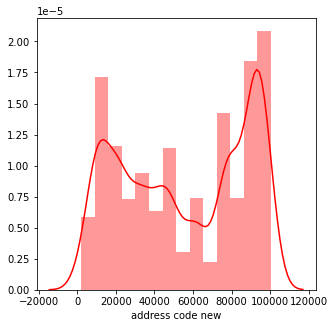

In [35]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(data['address code new'],color='red')

In [36]:
segment = pd.get_dummies(data['segment'])
classes = pd.get_dummies(data['class'])
location = pd.get_dummies(data['location'])
delivery_type = pd.get_dummies(data['delivery type'])
# Above in the business_code column we can see they are categorical ones, so we make new feature
# out of them 
data1 = pd.concat([data, segment, classes, location, delivery_type], axis = 1)

In [37]:
data1.columns

Index(['id', 'departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'RID', 'profit',
       'delivery date', 'address code', 'departure state', 'placement date',
       'duration', 'address code new', 'Consumer', 'Corporate', 'Home Office',
       'fynota', 'kariox', 'qexty', 'Central', 'East', 'South', 'West',
       'First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype='object')

In [38]:
data1['placement_year'] = data1['placement date'].dt.year
data1['placement_month'] = data1['placement date'].dt.month
data1['placement_day'] = data1['placement date'].dt.day
data1['placement_week'] = data1['placement date'].dt.week
data1['placement_which_day'] = data1['placement date'].dt.dayofweek
data1['placement_quarter'] = data1['placement date'].dt.quarter

In [39]:
features = data1.copy()

features['delivery_year'] = features['delivery date'].dt.year
features['delivery_month'] = features['delivery date'].dt.month
features['delivery_day'] = features['delivery date'].dt.day
features['deliveryt_week'] = features['delivery date'].dt.week
features['delivery_which_day'] = features['delivery date'].dt.dayofweek
features['delivery_quarter'] = features['delivery date'].dt.quarter

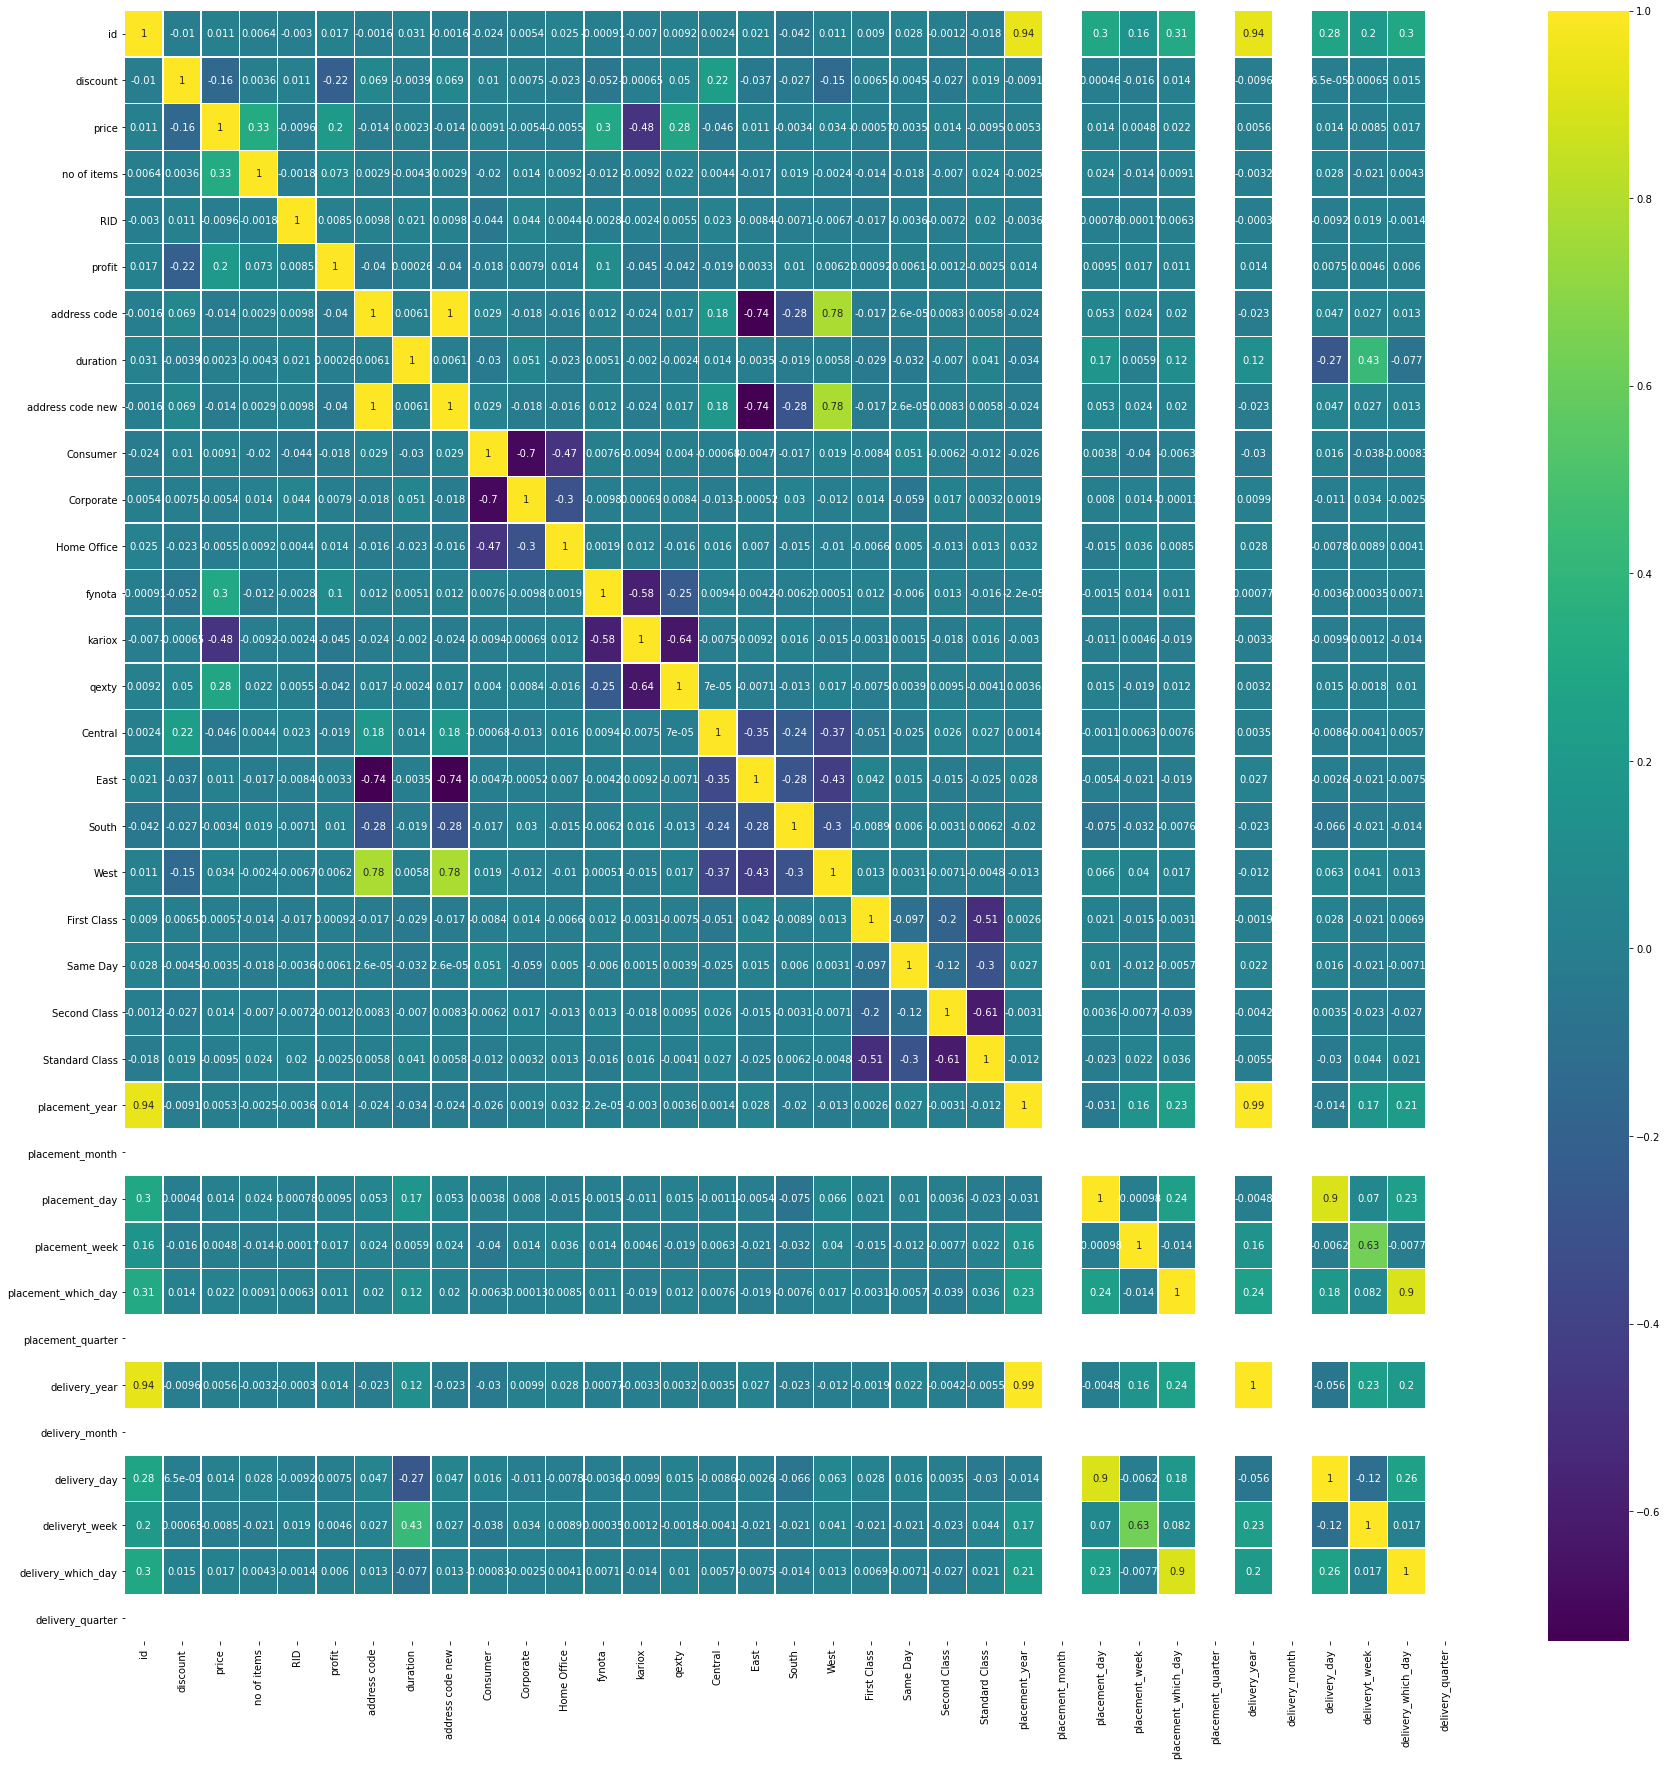

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(features.corr(),annot=True,cmap='viridis',linewidths=.5)

In [41]:
print(features['placement_month'].nunique())
print(features['placement_quarter'].nunique())
print(features['delivery_month'].nunique())

1
1
1


In [42]:
# columns to be removed: 
# placement_month, placement_quarter, delivery_month, placement_year, placement_day, Standard Class, East, address code
# Consumer

In [43]:
feature_set = features.drop(['id', 'placement_month', 'placement_quarter', 'delivery_month', 'placement_year', 
                             'placement_day', 'Standard Class', 'East', 'address code', 'Consumer', 'departure city',
                            'delivery date', 'departure state', 'placement date', 'location', 'class', 'segment',
                               'sub-class', 'delivery type', 'placement_quarter', 'placement_which_day', 'placement_week',
                            ], axis = 1)

In [44]:
feature_set.columns

Index(['discount', 'price', 'no of items', 'RID', 'profit', 'duration',
       'address code new', 'Corporate', 'Home Office', 'fynota', 'kariox',
       'qexty', 'Central', 'South', 'West', 'First Class', 'Same Day',
       'Second Class', 'delivery_year', 'delivery_day', 'deliveryt_week',
       'delivery_which_day', 'delivery_quarter'],
      dtype='object')

In [45]:
y = feature_set['profit']

fe = feature_set.drop(['profit'], axis = 1)

X_train ,X_test, y_train, y_test = train_test_split(fe, y, test_size = 0.2, random_state=1)

In [46]:
random_model = RandomForestRegressor(n_estimators=500)

In [47]:
# feature_set.to_csv('feature_set.csv')

In [48]:
#Fit
random_model.fit(X_train, y_train)

y_pred = random_model.predict(X_test)

#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy, 2), '%')

91.42 %


In [49]:
#Checking the accuracy
random_model_accuracy1 = round(random_model.score(X_test, y_test)*100,2)
print(round(random_model_accuracy1, 2), '%')

56.82 %


In [ ]:
scores = r2_score(y_test, y_pred)
scores

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Fucking Useless stuff.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 55, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
model = RandomForestRegressor(n_estimators = 366,
 min_samples_split = 2,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 28,
 bootstrap = False) 

In [ ]:
#Fit
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

#Checking the accuracy
random_model_accuracy2 = round(model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy2, 2), '%')

In [ ]:
#Checking the accuracy
random_model_accuracy3 = round(model.score(X_test, y_test)*100,2)
print(round(random_model_accuracy3, 2), '%')

### Maybe useful idk

In [53]:
import xgboost as xg

In [54]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 10) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
prediction = xgb_r.predict(X_test) 

In [55]:
train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)

In [77]:
params = {
    # Parameters that we are going to tune- they are default values now.
    'max_depth':6,
    'min_child_weight': 2,
    'eta':.03,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    # Other parameters
    'objective':'reg:squarederror',
}

In [57]:
params['eval_metric'] = "rmse"

num_boost_round = 999

In [58]:
model = xg.train(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    evals=[(test_dmatrix, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:281.99304
[1]	Test-rmse:278.67313
[2]	Test-rmse:263.52725
[3]	Test-rmse:250.76770
[4]	Test-rmse:244.45958
[5]	Test-rmse:241.04230
[6]	Test-rmse:237.85352
[7]	Test-rmse:235.27249
[8]	Test-rmse:233.82231
[9]	Test-rmse:232.50478
[10]	Test-rmse:231.91704
[11]	Test-rmse:230.28282
[12]	Test-rmse:227.93140
[13]	Test-rmse:227.85611
[14]	Test-rmse:227.72548
[15]	Test-rmse:227.69627
[16]	Test-rmse:226.82326
[17]	Test-rmse:226.77072
[18]	Test-rmse:226.73492
[19]	Test-rmse:225.96503
[20]	Test-rmse:225.92004
[21]	Test-rmse:226.01669
[22]	Test-rmse:225.91525
[23]	Test-rmse:225.84677
[24]	Test-rmse:225.32765
[25]	Test-rmse:225.27438
[26]	Test-rmse:224.86909
[27]	Test-rmse:224.78323
[28]	Test-rmse:224.63554
[29]	Test-rmse:224.38463
[30]	Test-rmse:224.46974
[31]	Test-rmse:224.32248
[32]	Test-rmse:224.32588
[33]	Test-rmse:224.30318
[34]	Test-rmse:224.44154
[35]	Test-rmse:224.75287
[36]	Test-rmse:224.76109
[37]	Test-rmse:224.48775
[38]	Test-rmse:224.53358
[39]	Test-rmse:224.60753
[40]	Test-

In [59]:
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 224.30 with 34 rounds


In [60]:
cv_results = xg.cv(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)

In [61]:
# cv_results
cv_results['test-rmse-mean'].min()

151.23729039999998

In [64]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,10) 
    for min_child_weight in range(1,5)
]

In [65]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xg.cv(
        params,
        train_dmatrix,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=5, min_child_weight=1
	RMSE 154.5703308 for 4 rounds
CV with max_depth=5, min_child_weight=2
	RMSE 147.7148788 for 64 rounds
CV with max_depth=5, min_child_weight=3
	RMSE 149.3061432 for 10 rounds
CV with max_depth=5, min_child_weight=4
	RMSE 151.9513808 for 2 rounds
CV with max_depth=6, min_child_weight=1
	RMSE 151.23729039999998 for 4 rounds
CV with max_depth=6, min_child_weight=2
	RMSE 150.74337020000002 for 27 rounds
CV with max_depth=6, min_child_weight=3
	RMSE 145.5367432 for 6 rounds
CV with max_depth=6, min_child_weight=4
	RMSE 147.992601 for 4 rounds
CV with max_depth=7, min_child_weight=1
	RMSE 152.89362880000002 for 5 rounds
CV with max_depth=7, min_child_weight=2
	RMSE 151.2647522 for 6 rounds
CV with max_depth=7, min_child_weight=3
	RMSE 147.3876814 for 7 rounds
CV with max_depth=7, min_child_weight=4
	RMSE 146.6097166 for 3 rounds
CV with max_depth=8, min_child_weight=1
	RMSE 150.78807279999998 for 5 rounds
CV with max_depth=8, min_child_weight=2
	RMSE 1

In [66]:
params['max_depth'] = 6
params['min_child_weight'] = 3

In [67]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [68]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xg.cv(
        params,
        train_dmatrix,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	RMSE 145.5367432 for 6 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 149.8946196 for 3 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 158.66862799999998 for 3 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 161.1085006 for 14 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 148.4779954 for 16 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 149.79004179999998 for 16 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 148.63707419999997 for 18 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 154.08832999999998 for 10 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 143.42957380000001 for 15 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 142.2208008 for 22 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 152.6658842 for 11 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 154.15679640000002 for 20 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 144.365711 for 10 rounds
CV with subsample=0.7, colsample=0.9
	RMSE 148.2669166 for 10 rou

In [69]:
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9

In [70]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xg.cv(params, train_dmatrix, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['rmse'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
        
print("Best params: {}, RMSE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
Wall time: 1.08 s
	RMSE 142.2208008 for 22 rounds

CV with eta=0.2
Wall time: 1.45 s
	RMSE 149.71566620000002 for 29 rounds

CV with eta=0.1
Wall time: 1.67 s
	RMSE 144.56371240000001 for 35 rounds

CV with eta=0.05
Wall time: 2.63 s
	RMSE 141.5245514 for 62 rounds

CV with eta=0.01
Wall time: 9.75 s
	RMSE 141.3728828 for 262 rounds

CV with eta=0.005
Wall time: 16.3 s
	RMSE 141.30821699999998 for 455 rounds

Best params: 0.005, RMSE: 141.30821699999998


In [71]:
params['eta'] = .005

In [107]:
params = {
    # Parameters that we are going to tune- they are default values now.
    'max_depth':6,
    'min_child_weight': 2,
    'eta':.03,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    # Other parameters
    'objective':'reg:squarederror',
}

In [108]:
model = xg.train(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    evals=[(test_dmatrix, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:297.06351
[1]	Test-rmse:296.84180
[2]	Test-rmse:292.93460
[3]	Test-rmse:289.17630
[4]	Test-rmse:287.41782
[5]	Test-rmse:283.79614
[6]	Test-rmse:282.24765
[7]	Test-rmse:280.02957
[8]	Test-rmse:277.33380
[9]	Test-rmse:273.76453
[10]	Test-rmse:273.31021
[11]	Test-rmse:271.94522
[12]	Test-rmse:269.39066
[13]	Test-rmse:269.89139
[14]	Test-rmse:268.82721
[15]	Test-rmse:267.52377
[16]	Test-rmse:268.33136
[17]	Test-rmse:265.35333
[18]	Test-rmse:262.36542
[19]	Test-rmse:259.63119
[20]	Test-rmse:258.79816
[21]	Test-rmse:256.40042
[22]	Test-rmse:256.34512
[23]	Test-rmse:256.10291
[24]	Test-rmse:255.84255
[25]	Test-rmse:253.98320
[26]	Test-rmse:251.42601
[27]	Test-rmse:251.41426
[28]	Test-rmse:251.28120
[29]	Test-rmse:250.62608
[30]	Test-rmse:250.38731
[31]	Test-rmse:248.88864
[32]	Test-rmse:247.08337
[33]	Test-rmse:245.10550
[34]	Test-rmse:242.96744
[35]	Test-rmse:242.79558
[36]	Test-rmse:240.79869
[37]	Test-rmse:239.19389
[38]	Test-rmse:237.10869
[39]	Test-rmse:236.99385
[40]	Test-

In [109]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 206.53 in 146 rounds


In [111]:
preds = model.predict(test_dmatrix)

In [112]:
s = r2_score(y_test, preds)
s

0.5136376543962108